In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
length = 10 
width = 8

board = np.zeros((4, length, width))

In [3]:
board[1][2][3] = 2

In [4]:
board[1][2][3]

2.0

In [5]:
board[(1,2,3)] = 4

In [6]:
board[1,2,3]

4.0

In [7]:
# board

In [8]:
import sys
sys.path.append("/home/mizworski/PycharmProjects/PaperSoccerRL/")
from soccer.board import Board

ModuleNotFoundError: No module named 'soccer'

In [9]:
b = Board() 

NameError: name 'Board' is not defined

In [10]:
b.print_board()

NameError: name 'b' is not defined

In [11]:
board[1,2]

array([ 0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.])

In [9]:
fp = open('../data/raw/sc.txt') # open file on read mode
lines = fp.read().split("\n") # create a list containing all lines
fp.close() # close file

In [10]:
count = 0
for line in lines:
    if line == '[Site "kurnik"]':
        count += 1

In [11]:
count

646808

In [12]:
lines[:16]

['[Event "?"]',
 '[Site "kurnik"]',
 '[Date "2017.06.05"]',
 '[Round "-"]',
 '[Black "cukierekzkwasem"]',
 '[White "pfc7935g"]',
 '[Result "0-1"]',
 '[Time "15:05:39"]',
 '[TimeControl "120"]',
 '[BlackElo "1440"]',
 '[WhiteElo "1475"]',
 '',
 '1. 0 1 2. 4 1 3. 63 01 4. 35 77 5. 46 3605 6. 25 0312225 7. 75 77 8. 47 0 9.',
 '364 325 10. 05 22 11. 5 2 12. 7474 4 13. 5 2 14. 30 65031713 15. 50',
 '502724101643 16. 5024 1 17. 3 4 18. 1616 170364 19. 5206 0 20. 7435201610 16174',
 '21. 4460 6560 22. 30 667 23. 53 25 24. 53 317 25. 1644616 461724160 0-1']

In [13]:
games = []
game = ''
parsing_game = False
for line in lines:
    if line == '' and game != '':
        games.append(game)
        game = ''
    elif not line.startswith('['):
        game += line

In [14]:
len(games)

646808

In [15]:
games_history = []
for game in games:
    history = []
    for seq in game.split()[:-1]:
        if '.' not in seq:
            history.append(seq)
            
    games_history.append(history)

In [16]:
len(games_history)

646808

In [17]:
longest_game = 0
longest_path = 0

lgid = 0
lpid = 0

i = 0
for hist in games_history:
    if longest_game < len(hist):
        longest_game = len(hist)
        lgid = i
    
    count = 0
    for el in history:
        count += len(el)
    
    if longest_path < count:
        longest_path = count
        lpid = i
        
    i += 1
        

In [18]:
longest_game

62

In [19]:
longest_path

65

In [20]:
# only games with at least 1 round
games_history_new = list(filter(lambda hist: len(hist) > 0, games_history))

In [21]:
# rounds per game
sum(list(map(len, games_history_new))) / len(games_history_new)

34.13738787332227

In [22]:
empty_games = 0
for history in games_history:
    if history == []:
        empty_games += 1
        
empty_games

2559

In [23]:
# path length per move
average_move_length = list(map(lambda hist: sum(list(map(len, hist))) / len(hist), games_history_new))

sum(average_move_length) / len(average_move_length)

2.55856437713069

In [24]:
# path length per game
average_game_path_len = list(map(lambda hist: sum(list(map(len, hist))), games_history_new))

sum(average_game_path_len) / len(average_game_path_len)

94.04819875545014

In [25]:
# count = 0
# for line in lines:
#     if 'Elo' in line:
#         elo = re.findall('"([^"]*)"', line)[0]
#         print(int(elo))
        
elos = list(map(lambda line: int(re.findall('"([^"]*)"', line)[0]),filter(lambda line: 'Elo' in line, lines)))

In [26]:
elos_series = pd.Series(elos)

In [27]:
ranges = [0, 1150, 1250,1400, 1650, 3100]
elos_ranges = elos_series.groupby(pd.cut(elos_series, ranges)).count()

In [28]:
elos_ranges

(0, 1150]        87553
(1150, 1250]    439243
(1250, 1400]    356364
(1400, 1650]    293897
(1650, 3100]    116559
dtype: int64

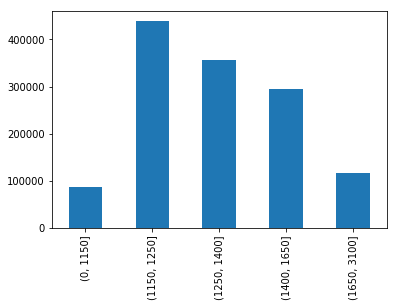

In [29]:
elos_ranges.plot.bar()
plt.show()

In [36]:
from skimage.io import imread, imshow

In [37]:
img = imread('/home/mizworski/Documents/PrzeszłeZajęcia/SIK-projekt/10568966_707962132573956_5087509836809801898_n.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mizworski/Documents/PrzeszłeZajęcia/SIK-projekt/10568966_707962132573956_5087509836809801898_n.jpg'

In [ ]:
img.shape

In [ ]:
x = np.arange(16.0).reshape(2, 2, 4)

In [ ]:
x.shape

In [ ]:
np.dsplit(x, 4)

In [ ]:
len(np.dsplit(x, 4))

In [ ]:
np.dsplit(x, 4)[1].reshape((2,2))

In [ ]:
games_history_new

In [ ]:
''

In [148]:
arr = np.array([[1,2], [3, 4], [5, 6]])

In [152]:
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [153]:
arr.shape

(3, 2)

In [151]:
arr.flatten()

array([1, 2, 3, 4, 5, 6])

In [157]:
arr.flatten().reshape((2, 3)).reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [167]:
df = pd.DataFrame([arr.flatten()])
df2 = pd.DataFrame([arr.flatten()])

In [172]:
df.append(df2, ignore_index=True)

,0,1,2,3,4,5
0,1,2,3,4,5,6
1,1,2,3,4,5,6


In [173]:
df3 = pd.DataFrame()

In [174]:
df3.append(df.append(df2))

,0,1,2,3,4,5
0,1,2,3,4,5,6
0,1,2,3,4,5,6


In [38]:
int(1/2)

0

In [42]:
int(2.000)

2